# Cropping d'images

**Format Yolo :** `<object-class> <x-center> <y-center> <width> <height>`

In [67]:
import cv2
import matplotlib.pyplot as plt
import os

In [69]:
IMAGE_PATH = (
    "anotated_data/train/images/01a650_jpg.rf.3f5718a38a386267c195846527073efc.jpg"
)
LABEL_PATH = (
    "anotated_data/train/labels/01a650_jpg.rf.3f5718a38a386267c195846527073efc.txt"
)

IMAGE_DIR = "anotated_data/train/images/"
LABEL_DIR = "anotated_data/train/labels/"

In [74]:
def get_image_list(image_dir, limit=None):
    image_list = sorted(os.listdir(image_dir))
    if limit:
        image_list = image_list[:limit]
    return image_list

In [62]:
def get_yolo_rect(image, label_path):
    img_height, img_width = image.shape[:2]
    with open(label_path, "r") as f:
        line = f.readline()
        _, x_center, y_center, width, height = map(float, line.split())

        x_center_px = int(x_center * img_width)
        y_center_px = int(y_center * img_height)
        w_pixel = int(width * img_width)
        h_pixel = int(height * img_height)

        x = x_center_px - w_pixel // 2
        y = y_center_px - h_pixel // 2

        return x, y, w_pixel, h_pixel


In [65]:
def display_image_with_rect(image_path, label_path):
    image = cv2.imread(image_path)
    x, y, w, h = get_yolo_rect(image, label_path)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor="r", facecolor="none")
    plt.gca().add_patch(rect)
    plt.axis("off")
    plt.show()

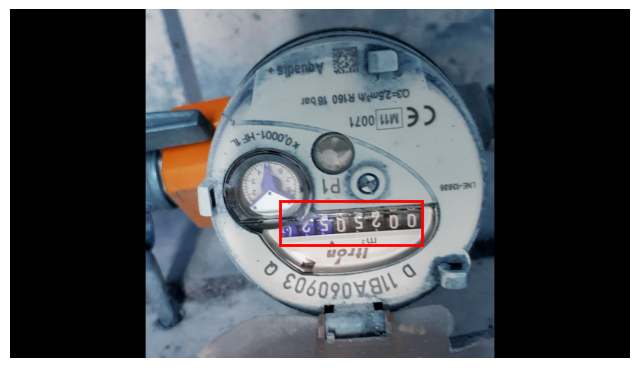

In [66]:
display_image_with_rect(IMAGE_PATH, LABEL_PATH)

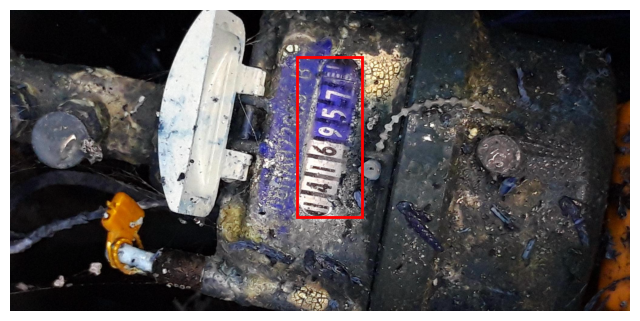

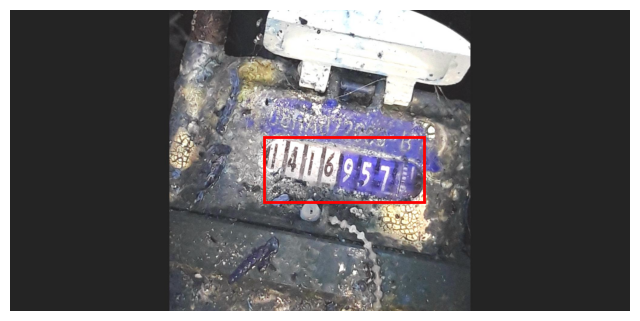

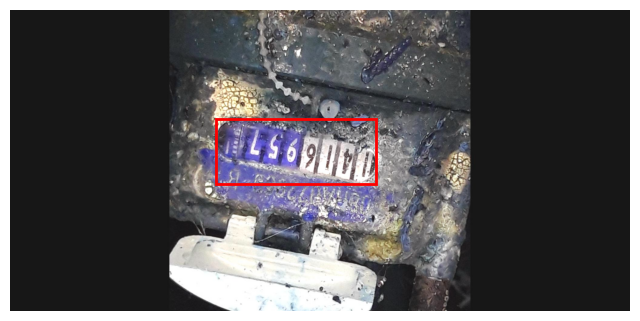

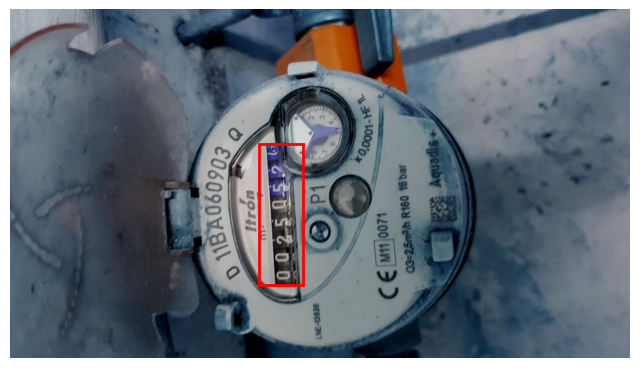

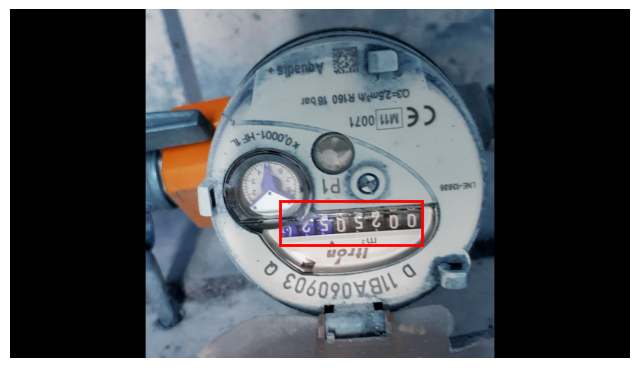

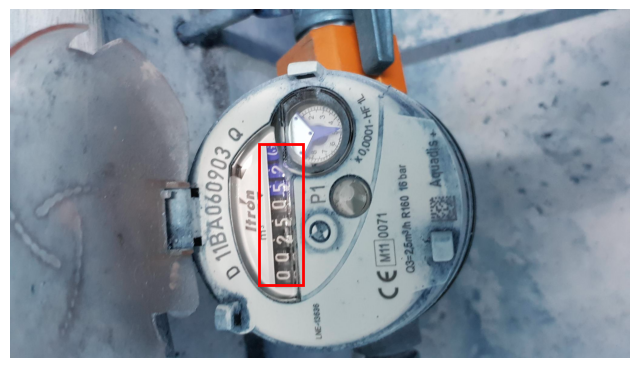

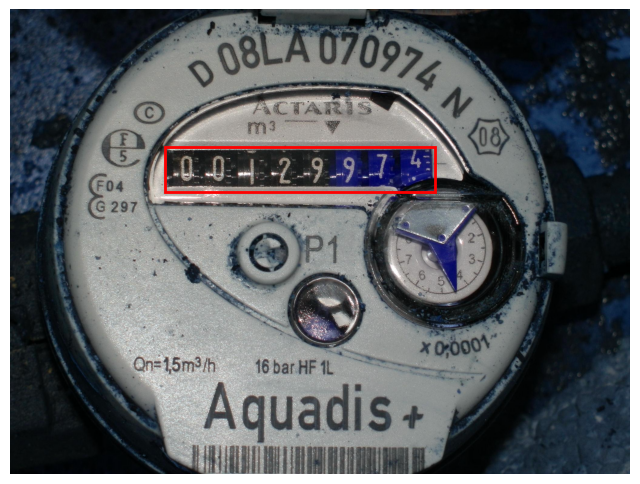

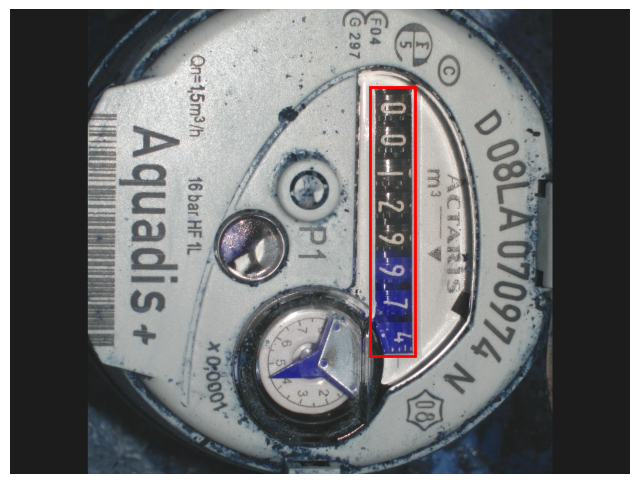

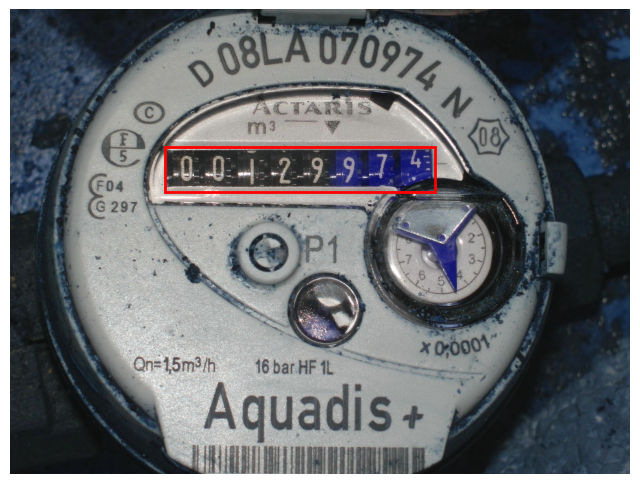

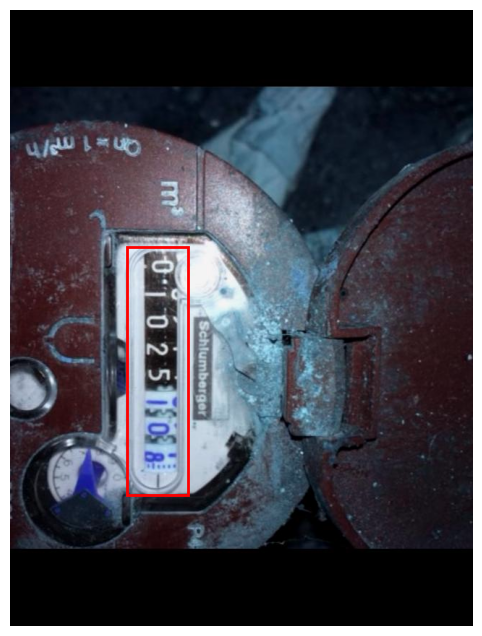

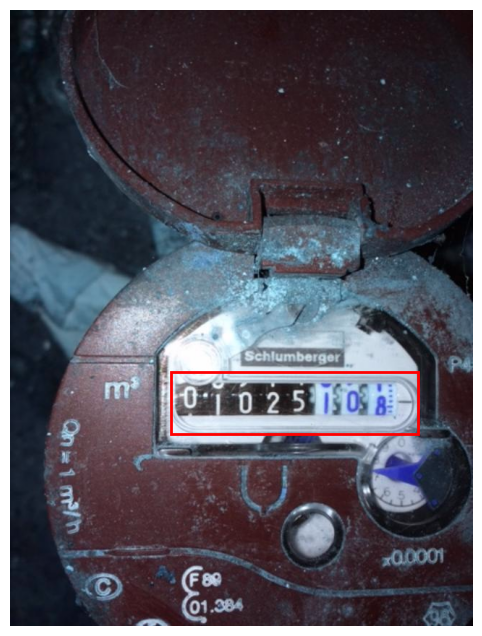

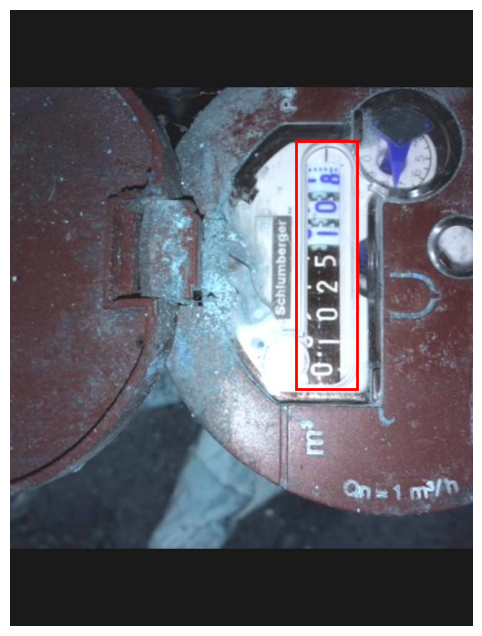

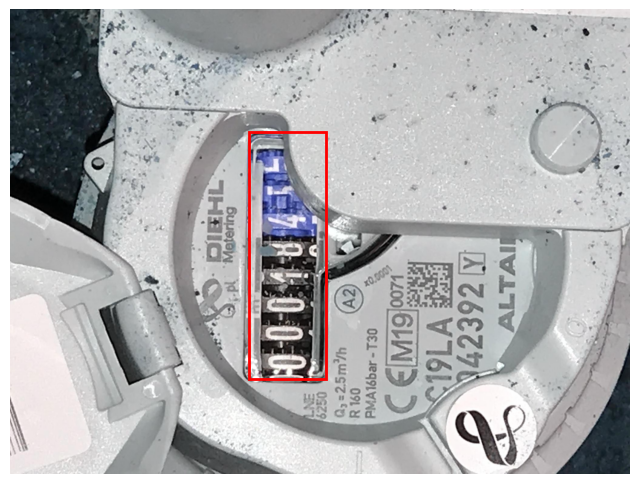

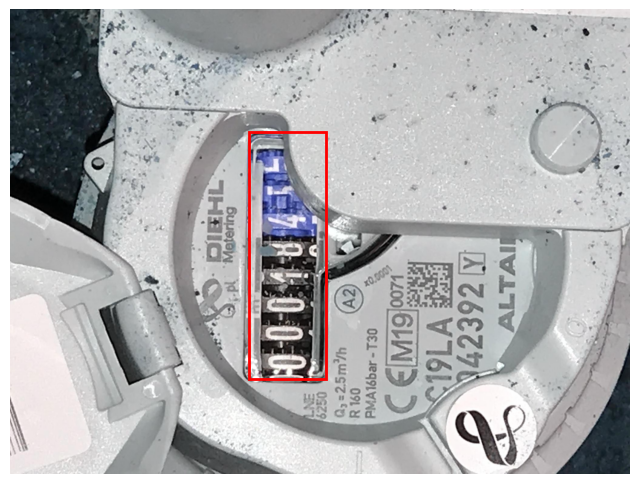

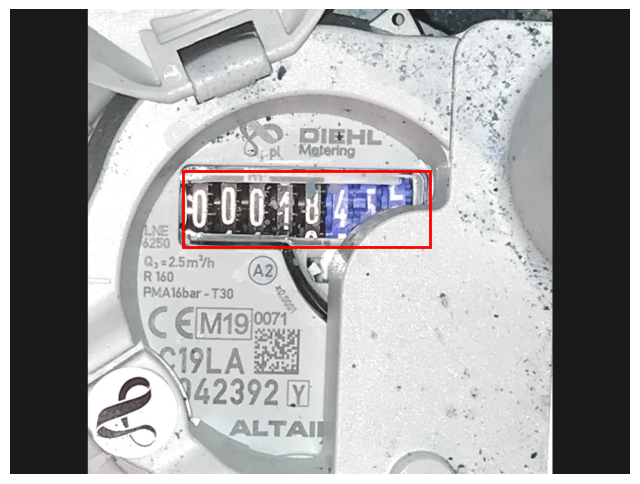

In [75]:
num_images = 15

image_files = sorted(os.listdir(IMAGE_DIR))[:num_images]

for image_file in get_image_list(IMAGE_DIR, num_images):
    image_path = os.path.join(IMAGE_DIR, image_file)
    label_path = os.path.join(LABEL_DIR, image_file.replace(".jpg", ".txt"))
    display_image_with_rect(image_path, label_path)


In [78]:
def crop_image(image, rect):
    x, y, w, h = rect
    return image[y : y + h, x : x + w]

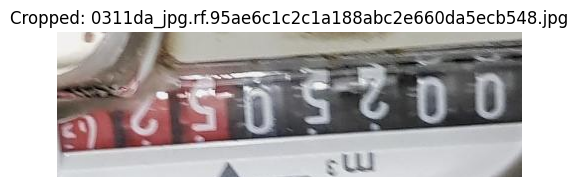

In [80]:
cropped_image = crop_image(cv2.imread(IMAGE_PATH), get_yolo_rect(image, LABEL_PATH))

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Cropped: {image_file}")
plt.show()